<a href="https://colab.research.google.com/github/AkithaPasandul/DS_Individual-Coursework/blob/main/DS_Individual_Coursework_30452.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1. Data Loading and Preprocessing**

**Load the dataset into pandas DataFrame**

In [1]:
import pandas as pd
dataframe = pd.read_csv(r'/content/customer_purchase.csv')

In [2]:
dataframe.head()

,CID,TID,Gender,Age Group,Purchase Date,Product Category,Discount Availed,Discount Name,Discount Amount (INR),Gross Amount,Net Amount,Purchase Method,Location
0,943146,5876328741,Female,25-45,30/08/2023 20:27:08,Electronics,Yes,FESTIVE50,64.30,725.304000,661.004000,Credit Card,Ahmedabad
1,180079,1018503182,Male,25-45,23/02/2024 09:33:46,Electronics,Yes,SEASONALOFFER21,175.19,4638.991875,4463.801875,Credit Card,Bangalore
2,337580,3814082218,Other,60 and above,06/03/2022 09:09:50,Clothing,Yes,SEASONALOFFER21,211.54,1986.372575,1774.832575,Credit Card,Delhi
3,180333,1395204173,Other,60 and above,04/11/2020 04:41:57,Sports & Fitness,No,NaN,0.00,5695.612650,5695.612650,Debit Card,Delhi
4,447553,8009390577,Male,18-25,31/05/2022 17:00:32,Sports & Fitness,Yes,WELCOME5,439.92,2292.651500,1852.731500,Credit Card,Delhi


Drop the unnecessary columes

In [3]:
dataframe.drop(['Gender','Age Group', 'TID', 'Purchase Method', 'Discount Availed', 'Discount Name', 'Discount Amount (INR)', 'Net Amount', 'Location'], axis=1, inplace=True)

In [4]:
dataframe.head()

,CID,Purchase Date,Product Category,Gross Amount
0,943146,30/08/2023 20:27:08,Electronics,725.304000
1,180079,23/02/2024 09:33:46,Electronics,4638.991875
2,337580,06/03/2022 09:09:50,Clothing,1986.372575
3,180333,04/11/2020 04:41:57,Sports & Fitness,5695.612650
4,447553,31/05/2022 17:00:32,Sports & Fitness,2292.651500


**Check if there any missing values**

In [5]:
print("\nMissing Values Count:")
dataframe.isnull().sum()


Missing Values Count:


,0
CID,0
Purchase Date,0
Product Category,0
Gross Amount,0




No missing values are found



In [6]:
dataframe = dataframe.rename(columns={'CID': 'Customer_id', 'Product Category': 'Product_Category', 'Purchase Date':'Timestamp', 'Gross Amount': 'Purchase_Amount'})
dataframe.head()

,Customer_id,Timestamp,Product_Category,Purchase_Amount
0,943146,30/08/2023 20:27:08,Electronics,725.304000
1,180079,23/02/2024 09:33:46,Electronics,4638.991875
2,337580,06/03/2022 09:09:50,Clothing,1986.372575
3,180333,04/11/2020 04:41:57,Sports & Fitness,5695.612650
4,447553,31/05/2022 17:00:32,Sports & Fitness,2292.651500


Because this Purchase_Amount colume data in Indian rupees convert it into United states dollar(USD)

In [7]:
ip_to_usd = 0.012
dataframe['Purchase_Amount'] = dataframe['Purchase_Amount'] * ip_to_usd
dataframe.head()

,Customer_id,Timestamp,Product_Category,Purchase_Amount
0,943146,30/08/2023 20:27:08,Electronics,8.703648
1,180079,23/02/2024 09:33:46,Electronics,55.667902
2,337580,06/03/2022 09:09:50,Clothing,23.836471
3,180333,04/11/2020 04:41:57,Sports & Fitness,68.347352
4,447553,31/05/2022 17:00:32,Sports & Fitness,27.511818


Find unique values form the cateory colume

In [8]:
unique_values = dataframe['Product_Category'].unique()
print(unique_values)

['Electronics' 'Clothing' 'Sports & Fitness' 'Pet Care' 'Home & Kitchen'
 'Books' 'Beauty and Health' 'Other' 'Toys & Games']


**Converting invoice_date colume to proper formate**

In [9]:
dataframe['Timestamp'] = pd.to_datetime(dataframe['Timestamp'], format='%d/%m/%Y %H:%M:%S')

In [10]:
dataframe.head()

,Customer_id,Timestamp,Product_Category,Purchase_Amount
0,943146,2023-08-30 20:27:08,Electronics,8.703648
1,180079,2024-02-23 09:33:46,Electronics,55.667902
2,337580,2022-03-06 09:09:50,Clothing,23.836471
3,180333,2020-11-04 04:41:57,Sports & Fitness,68.347352
4,447553,2022-05-31 17:00:32,Sports & Fitness,27.511818


**Ensure all numerical columns are correctly formatted and free of inconsistencies**

In [11]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55000 entries, 0 to 54999
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Customer_id       55000 non-null  int64         
 1   Timestamp         55000 non-null  datetime64[ns]
 2   Product_Category  55000 non-null  object        
 3   Purchase_Amount   55000 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 1.7+ MB


converting customer_id colume data interger to string(object) type

In [12]:
dataframe['Customer_id'] = dataframe['Customer_id'].astype(str)

Save clean data set as dataframe_cleaned

In [13]:
dataframe_cleaned = dataframe.copy()

# **2. Exploratory Data Analysis**

**Summary statistics of the dataset**

In [14]:
dataframe_cleaned['Purchase_Amount'].describe()

,Purchase_Amount
count,55000.000000
mean,36.155239
std,20.621173
min,1.637452
25%,18.745336
50%,35.451194
75%,52.106660
max,100.737907


**Total purchases over time**

In [15]:
daily_purchases = dataframe_cleaned.groupby(dataframe_cleaned['Timestamp'].dt.date)['Purchase_Amount'].sum()   #Group by date and calculate total purchases

In [16]:
print("Total purchases over time:")
print(daily_purchases)

Total purchases over time:
Timestamp
2019-09-19     657.315540
2019-09-20     694.410822
2019-09-21    1111.806360
2019-09-22     767.974410
2019-09-23     887.836320
                 ...     
2024-09-14    1254.777930
2024-09-15     808.598543
2024-09-16    1194.838155
2024-09-17    1202.235300
2024-09-18    1051.452675
Name: Purchase_Amount, Length: 1827, dtype: float64


**Most propular product**

In [17]:
popular_product = dataframe_cleaned['Product_Category'].mode()[0]   #To find the most frequent item name
print(f"\n Most popular product: {popular_product}")


 Most popular product: Electronics


**Average spending per customer**

In [18]:
average_spending = dataframe_cleaned.groupby('Customer_id')['Purchase_Amount'].mean().round(2) #display the average_spending rounded to 2 decimal places
print("\nAverage spending per customer:")
average_spending


Average spending per customer:


,Purchase_Amount
Customer_id,
100009,79.85
100037,42.88
100063,6.27
100089,38.02
100096,51.85
...,...
999876,52.47
999883,18.39
999910,31.76


**Most active customer**
*   Below code find the customer ID that appears most frequently in the dataset and then print that customer ID

In [19]:
most_active_customer = dataframe_cleaned['Customer_id'].mode()[0]
print(f"\nMost active customer: {most_active_customer}")


Most active customer: 308795


# **3. Data Visualization**

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
dataframe_cleaned['Timestamp'] = pd.to_datetime(dataframe_cleaned['Timestamp'])

**Sales over time**

In [22]:
daily_sales = dataframe_cleaned.groupby(dataframe_cleaned['Timestamp'].dt.date)['Purchase_Amount'].sum()

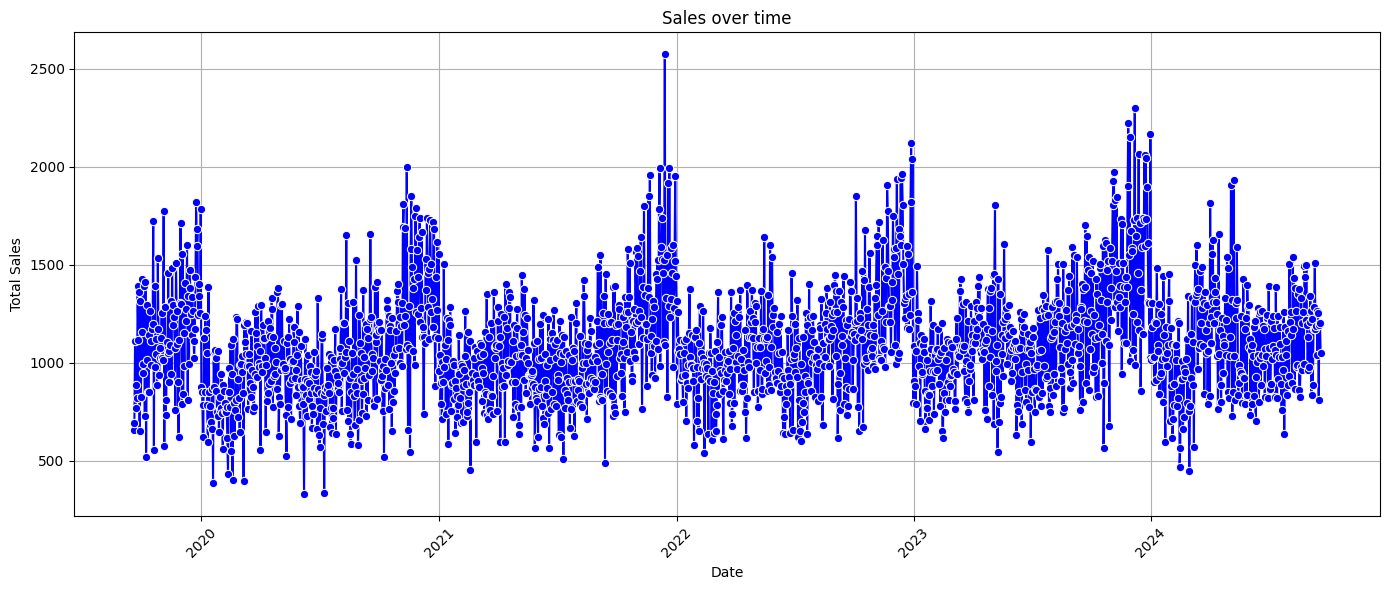

In [23]:
plt.figure(figsize=(14, 6))
sns.lineplot(x=daily_sales.index, y=daily_sales.values, marker='o', color='b')
plt.title('Sales over time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

By observing the line chart there is a noticeable increase in sales towards the end of 2021 specifically during the winter holiday season. This rise in sales can be attributed to increased consumer spending during the holidays. Based on this historical trend we can pedict a similar rise in sales during the winter of 2024 as consumer behavior tends to repeat during holiday seasons.



**Most purchased product categories**

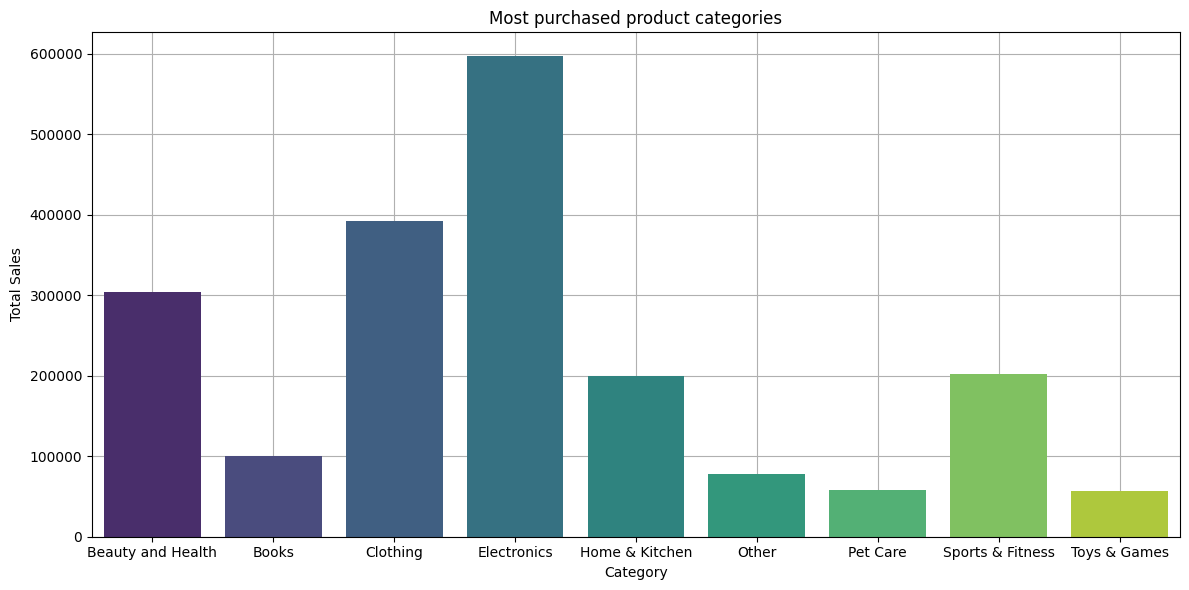

In [24]:
category_sales = dataframe_cleaned.groupby('Product_Category')['Purchase_Amount'].sum()

plt.figure(figsize=(12, 6))
sns.barplot(x=category_sales.index, y=category_sales.values, hue=category_sales.index,
            palette='viridis', dodge=False, legend=False)
plt.title('Most purchased product categories')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.grid(True)
plt.gca().set_axisbelow(True)  #To show grid lines behind the bars
plt.tight_layout()
plt.show()

Accoring the barplot Electronic and clotting have highest sales and which can be their high demand and popularity among customers.

**Percentage of revenue by product categories**

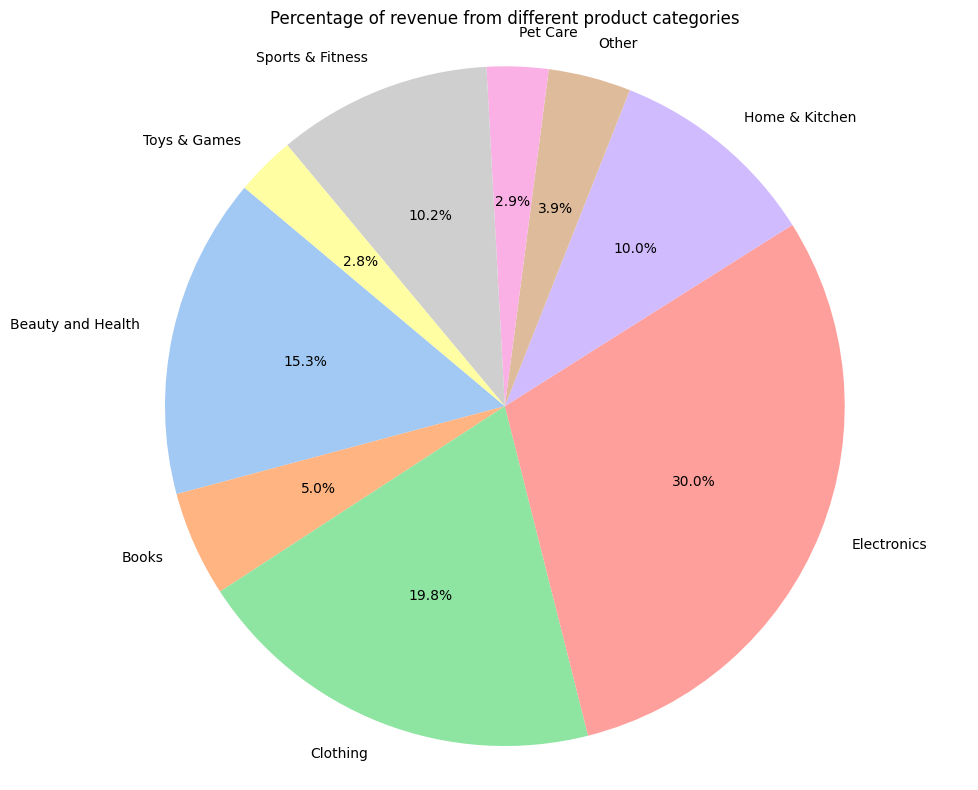

In [25]:
category_revenue = dataframe_cleaned.groupby('Product_Category')['Purchase_Amount'].sum()

plt.figure(figsize=(10, 8))
plt.pie(category_revenue.values, labels=category_revenue.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Percentage of revenue from different product categories')
plt.axis('equal')
plt.tight_layout()
plt.show()

**Purchase amount vs time**

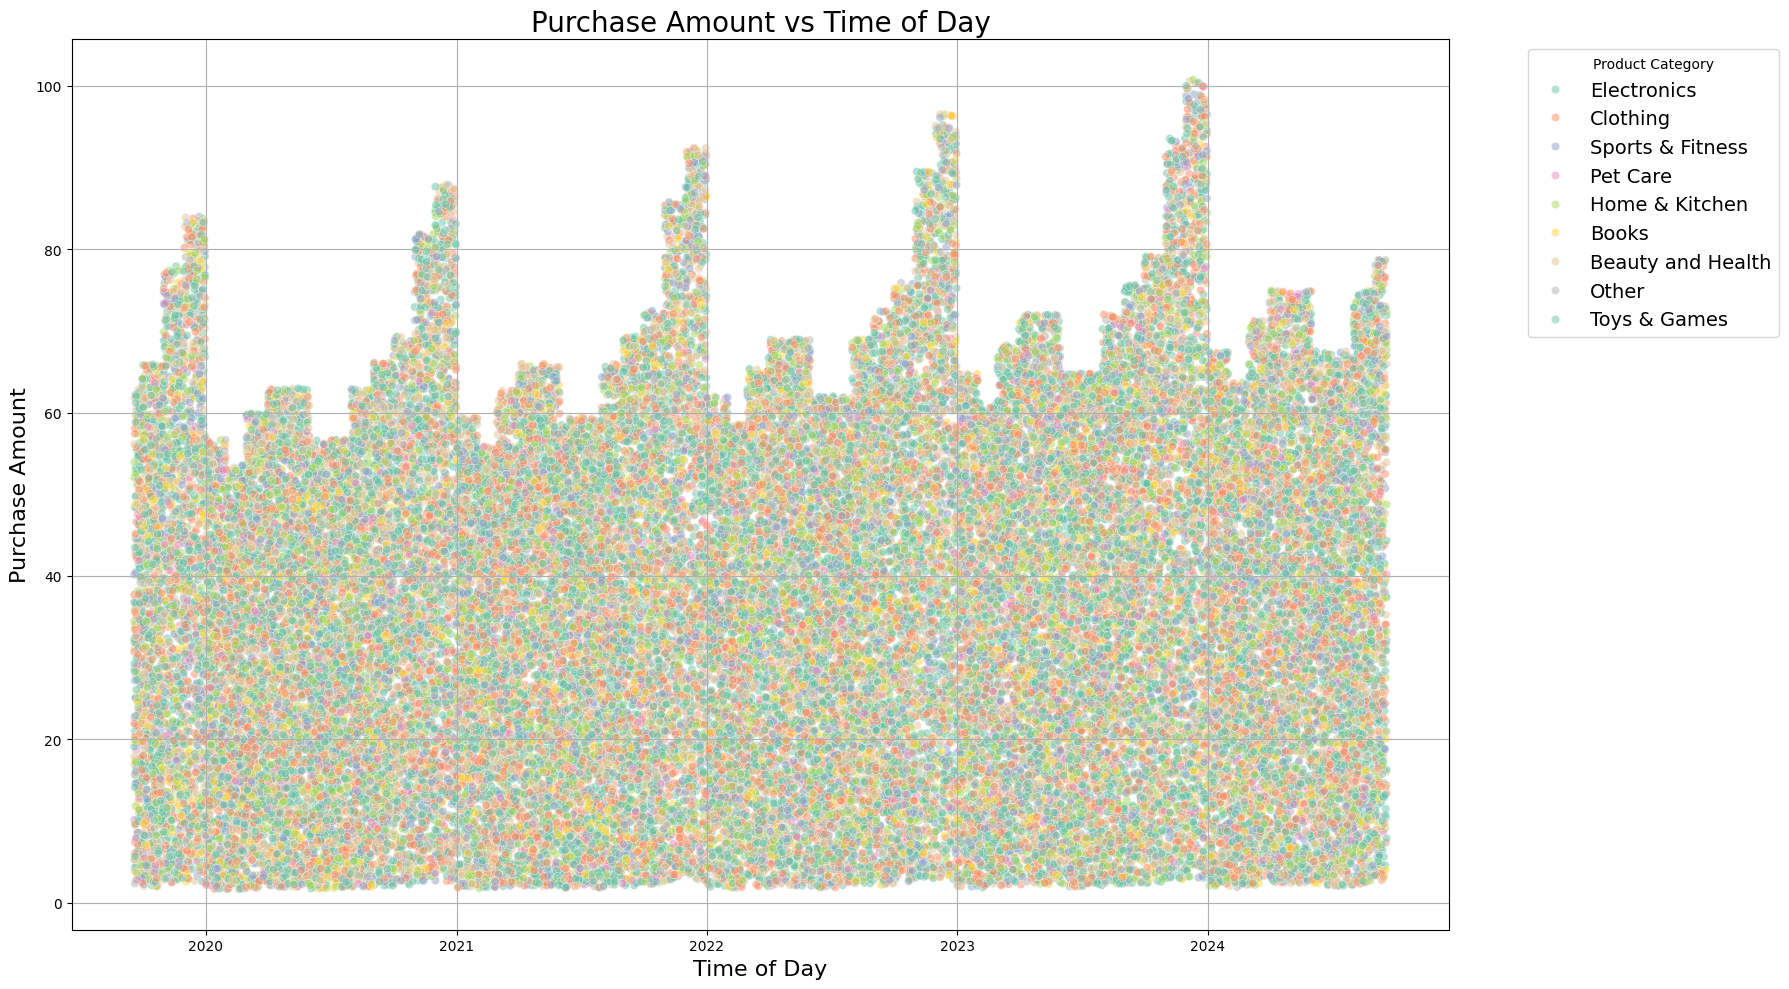

In [26]:
dataframe_cleaned['Date'] = dataframe_cleaned['Timestamp'].dt.date

plt.figure(figsize=(18, 10))
sns.scatterplot(x=dataframe_cleaned['Date'],
                y=dataframe_cleaned['Purchase_Amount'],
                alpha=0.5,
                hue=dataframe_cleaned['Product_Category'],
                palette='Set2'
                )
plt.title('Purchase Amount vs Time of Day', fontsize=20)
plt.xlabel('Time of Day', fontsize=16)
plt.ylabel('Purchase Amount', fontsize=16)
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

# **4. Web Scraping Component**

In [27]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

### **Scraping relevant data from an e-commerce website**

In [28]:
# Function to extract Product Title
def get_title(soup):
    try:
        # Outer Tag Object
        title = soup.find("span", attrs={"id":'productTitle'})

        # Inner NavigatableString Object
        title_value = title.text

        # Title as a string value
        title_string = title_value.strip()

    except AttributeError:
        title_string = ""

    return title_string


# Function to extract Product Price
def get_price(soup):
    try:
        price = soup.find('span', attrs={'class':'a-price-whole'}).text.strip()

    except AttributeError:

        try:
            price = soup.find('span', attrs={'class':'a-offscreen'}).text.strip()
        except:
            price = ""

    return price


# Function to extract Product Rating
def get_rating(soup):
    try:
        rating = soup.find('span', attrs={'class':'a-icon-alt'}).text.strip()

    except AttributeError:
        try:
            rating = soup.find('span', attrs={'class':'a-icon-alt'}).string.strip()
        except:
            rating = ""

    return rating


# Function to extract Number of User Reviews
def get_review_count(soup):
    try:
        review_count = soup.find('span', attrs={'id':'acrCustomerReviewText'}).string.strip()

    except AttributeError:
        review_count = ""

    return review_count

#### scrap data to get electronics prices from amazon website

In [29]:
if __name__ == '__main__':

    # add your user agent
    HEADERS = ({'User-Agent':'', 'Accept-Language': 'en-US, en;q=0.5'})

    # The webpage URL
    URL = "https://www.amazon.com/s?k=electronics&ref=nb_sb_noss"

    # HTTP Request
    webpage = requests.get(URL, headers=HEADERS)

    # Soup Object containing all data
    soup = BeautifulSoup(webpage.content, "html.parser")

    # Fetch links as List of tag objects
    links = soup.find_all("a", attrs={'class':'a-link-normal s-no-outline'})

    # Store the links
    links_list = []

    # Loop for extracting links from tag objects
    for link in links:
            links_list.append(link.get('href'))

    d = {"title":[], "price":[], "rating":[], "reviews":[]}

    # Loop for extracting product details from each link
    for link in links_list:
        new_webpage = requests.get("https://www.amazon.com" + link, headers=HEADERS)

        new_soup = BeautifulSoup(new_webpage.content, "html.parser")

        # Function calls to display all necessary product information
        d['title'].append(get_title(new_soup))
        d['price'].append(get_price(new_soup))
        d['rating'].append(get_rating(new_soup))
        d['reviews'].append(get_review_count(new_soup))


    electronics_df = pd.DataFrame.from_dict(d)
    electronics_df['title'].replace('', np.nan, inplace=True)
    electronics_df = electronics_df.dropna(subset=['title'])

<ipython-input-29-c82ea790eea2>:41: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  electronics_df['title'].replace('', np.nan, inplace=True)


In [30]:
electronics_df.head()

,title,price,rating,reviews
0,"Apple AirPods 4 Wireless Earbuds, Bluetooth He...",119.,3.2 out of 5 stars,"1,204 ratings"
1,"Amazon Echo Show 5 (newest model), Smart displ...",44.,4.4 out of 5 stars,"38,197 ratings"
2,JBL Tune 510BT - Bluetooth headphones with up ...,29.,4.5 out of 5 stars,"68,034 ratings"
3,JBL CHARGE 5 - Portable Waterproof (IP67) Blue...,139.,4.3 out of 5 stars,"30,093 ratings"
4,JBL Tune Flex - True Wireless Noise Cancelling...,49.,4.4 out of 5 stars,"6,788 ratings"


#### scrap data to get clothing data from amazon website

In [31]:
if __name__ == '__main__':

    # add your user agent
    HEADERS = ({'User-Agent':'', 'Accept-Language': 'en-US, en;q=0.5'})

    # The webpage URL
    URL = "https://www.amazon.com/s?k=office+casual+clothing&ref=sr_nr_p_cosmo_multi_pt_1"

    # HTTP Request
    webpage = requests.get(URL, headers=HEADERS)

    # Soup Object containing all data
    soup = BeautifulSoup(webpage.content, "html.parser")

    # Fetch links as List of tag objects
    links = soup.find_all("a", attrs={'class':'a-link-normal s-no-outline'})

    # Store the links
    links_list = []

    # Loop for extracting links from tag objects
    for link in links:
            links_list.append(link.get('href'))

    d = {"title":[], "price":[], "rating":[], "reviews":[]}

    # Loop for extracting product details from each link
    for link in links_list:
        new_webpage = requests.get("https://www.amazon.com" + link, headers=HEADERS)

        new_soup = BeautifulSoup(new_webpage.content, "html.parser")

        # Function calls to display all necessary product information
        d['title'].append(get_title(new_soup))
        d['price'].append(get_price(new_soup))
        d['rating'].append(get_rating(new_soup))
        d['reviews'].append(get_review_count(new_soup))


    cloths_df = pd.DataFrame.from_dict(d)
    cloths_df['title'].replace('', np.nan, inplace=True)
    cloths_df =cloths_df.dropna(subset=['title'])

<ipython-input-31-2f15811086c9>:41: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cloths_df['title'].replace('', np.nan, inplace=True)


In [32]:
cloths_df.head()

,title,price,rating,reviews
0,SAMPEEL V Neck Long Sleeve Shirts for Women Ca...,59.,4.3 out of 5 stars,"1,278 ratings"
1,IWOLLENCE Women's Wide Leg Pants with Pockets ...,28.,4.4 out of 5 stars,"2,312 ratings"
2,AUTOMET Womens Long Sleeve Shirts V-Neck Lace ...,57.,4.2 out of 5 stars,508 ratings
3,WIHOLL Womens Polo Shirts Long Sleeve Business...,39.,4.4 out of 5 stars,111 ratings
4,Blooming Jelly Women's Dressy Casual Blouses B...,103.,4.3 out of 5 stars,708 ratings


#### scrap data to get beauty and health data from amazon website

In [33]:
if __name__ == '__main__':

    # add your user agent
    HEADERS = ({'User-Agent':'', 'Accept-Language': 'en-US, en;q=0.5'})

    # The webpage URL
    URL = "https://www.amazon.com/s?k=beauty+and+health&crid=1BNQD9S3T243R&sprefix=beauty+and+hea%2Caps%2C443&ref=nb_sb_ss_ts-doa-p_1_14"

    # HTTP Request
    webpage = requests.get(URL, headers=HEADERS)

    # Soup Object containing all data
    soup = BeautifulSoup(webpage.content, "html.parser")

    # Fetch links as List of tag objects
    links = soup.find_all("a", attrs={'class':'a-link-normal s-no-outline'})

    # Store the links
    links_list = []

    # Loop for extracting links from tag objects
    for link in links:
            links_list.append(link.get('href'))

    d = {"title":[], "price":[], "rating":[], "reviews":[]}

    # Loop for extracting product details from each link
    for link in links_list:
        new_webpage = requests.get("https://www.amazon.com" + link, headers=HEADERS)

        new_soup = BeautifulSoup(new_webpage.content, "html.parser")

        # Function calls to display all necessary product information
        d['title'].append(get_title(new_soup))
        d['price'].append(get_price(new_soup))
        d['rating'].append(get_rating(new_soup))
        d['reviews'].append(get_review_count(new_soup))


    beauty_and_health_df = pd.DataFrame.from_dict(d)
    beauty_and_health_df['title'].replace('', np.nan, inplace=True)
    beauty_and_health_df = beauty_and_health_df.dropna(subset=['title'])

<ipython-input-33-d047ccdf2360>:41: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  beauty_and_health_df['title'].replace('', np.nan, inplace=True)


In [34]:
beauty_and_health_df.head()

,title,price,rating,reviews
0,Under Eye Patches - 30 Pairs - 24K Gold Eye Ma...,8.,4.1 out of 5 stars,"10,732 ratings"
1,Shower Steamers Aromatherapy - Relaxation Gift...,16.,4.2 out of 5 stars,"2,713 ratings"
2,"4 Pcs Clay Facial Mask Gift Set - Turmeric, Vi...",20.,4.5 out of 5 stars,"1,706 ratings"
3,"Facial Massager for Face and Neck, Red-Light-T...",54.,4.3 out of 5 stars,"1,238 ratings"
4,"e.l.f. Glow Reviver Lip Oil, Nourishing Tinted...",8.,4.6 out of 5 stars,"8,301 ratings"


#### scrap data to get sports and fitness data from amazon website

In [35]:
if __name__ == '__main__':

    # add your user agent
    HEADERS = ({'User-Agent':'', 'Accept-Language': 'en-US, en;q=0.5'})

    # The webpage URL
    URL = "https://www.amazon.com/s?k=Sports+%26+Fitness&crid=YA0QDRX6CWZ5&sprefix=sports+%26+fitness%2Caps%2C816&ref=nb_sb_noss_1"

    # HTTP Request
    webpage = requests.get(URL, headers=HEADERS)

    # Soup Object containing all data
    soup = BeautifulSoup(webpage.content, "html.parser")

    # Fetch links as List of tag objects
    links = soup.find_all("a", attrs={'class':'a-link-normal s-no-outline'})

    # Store the links
    links_list = []

    # Loop for extracting links from tag objects
    for link in links:
            links_list.append(link.get('href'))

    d = {"title":[], "price":[], "rating":[], "reviews":[]}

    # Loop for extracting product details from each link
    for link in links_list:
        new_webpage = requests.get("https://www.amazon.com" + link, headers=HEADERS)

        new_soup = BeautifulSoup(new_webpage.content, "html.parser")

        # Function calls to display all necessary product information
        d['title'].append(get_title(new_soup))
        d['price'].append(get_price(new_soup))
        d['rating'].append(get_rating(new_soup))
        d['reviews'].append(get_review_count(new_soup))


    Sports_Fitness_df = pd.DataFrame.from_dict(d)
    Sports_Fitness_df['title'].replace('', np.nan, inplace=True)
    Sports_Fitness_df = Sports_Fitness_df.dropna(subset=['title'])

<ipython-input-35-af7f6574aa99>:41: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Sports_Fitness_df['title'].replace('', np.nan, inplace=True)


In [36]:
Sports_Fitness_df.head()

,title,price,rating,reviews
0,"Push Up Board,Home Gym,Portable Exercise Equip...",59.,4.5 out of 5 stars,"1,084 ratings"
1,"WALITO Resistance Bands for Legs and Butt, Fab...",13.,4.7 out of 5 stars,"24,751 ratings"
2,"Vinsguir Ab Roller Wheel, Abs Workout Equipmen...",25.,4.5 out of 5 stars,"21,617 ratings"
3,Fitgriff® Gym Bag for Men & Women with Shoe & ...,22.,4.8 out of 5 stars,"7,164 ratings"
4,Dr. Scholl’s Sport Insoles - Superior Shock Ab...,17.,4.4 out of 5 stars,"5,750 ratings"


### **Integreting scraped data in to existing dataset**

In [37]:
data = dataframe_cleaned.copy()

In [38]:
# Add product colume for each data frames
electronics_df['Product_Category'] = 'Electronics'
cloths_df['Product_Category'] = 'Clothing'
beauty_and_health_df['Product_Category'] = 'Beauty and Health'
Sports_Fitness_df['Product_Category'] = 'Sports & Fitness'

#merge the dataframes
merge_scrap_data = pd.concat([electronics_df, cloths_df, beauty_and_health_df, Sports_Fitness_df], ignore_index=True)

In [39]:
merge_scrap_data.head()

,title,price,rating,reviews,Product_Category
0,"Apple AirPods 4 Wireless Earbuds, Bluetooth He...",119.,3.2 out of 5 stars,"1,204 ratings",Electronics
1,"Amazon Echo Show 5 (newest model), Smart displ...",44.,4.4 out of 5 stars,"38,197 ratings",Electronics
2,JBL Tune 510BT - Bluetooth headphones with up ...,29.,4.5 out of 5 stars,"68,034 ratings",Electronics
3,JBL CHARGE 5 - Portable Waterproof (IP67) Blue...,139.,4.3 out of 5 stars,"30,093 ratings",Electronics
4,JBL Tune Flex - True Wireless Noise Cancelling...,49.,4.4 out of 5 stars,"6,788 ratings",Electronics


#### Match the scraped products

In [40]:
merged_data = pd.merge(data, merge_scrap_data, on='Product_Category', how='left')

# Convert 'price' column to numeric, handling potential errors
merged_data['price'] = pd.to_numeric(merged_data['price'], errors='coerce')


merged_data['Current_Price'] = merged_data.apply(
    lambda row: row['price'] if row['Purchase_Amount'] == row['price'] else row['Purchase_Amount'], axis=1
)

# To remove duplicate rows based on key columns and keep first occurrence
merged_data = merged_data.drop_duplicates(subset=['Customer_id', 'Product_Category', 'Current_Price'], keep='first')

merged_data.drop_duplicates(inplace=True)

<ipython-input-40-a94f8cb96624>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data.drop_duplicates(inplace=True)


In [41]:
merged_data.head()

,Customer_id,Timestamp,Product_Category,Purchase_Amount,Date,title,price,rating,reviews,Current_Price
0,943146,2023-08-30 20:27:08,Electronics,8.703648,2023-08-30,"Apple AirPods 4 Wireless Earbuds, Bluetooth He...",119.0,3.2 out of 5 stars,"1,204 ratings",8.703648
16,180079,2024-02-23 09:33:46,Electronics,55.667902,2024-02-23,"Apple AirPods 4 Wireless Earbuds, Bluetooth He...",119.0,3.2 out of 5 stars,"1,204 ratings",55.667902
32,337580,2022-03-06 09:09:50,Clothing,23.836471,2022-03-06,SAMPEEL V Neck Long Sleeve Shirts for Women Ca...,59.0,4.3 out of 5 stars,"1,278 ratings",23.836471
80,180333,2020-11-04 04:41:57,Sports & Fitness,68.347352,2020-11-04,"Push Up Board,Home Gym,Portable Exercise Equip...",59.0,4.5 out of 5 stars,"1,084 ratings",68.347352
128,447553,2022-05-31 17:00:32,Sports & Fitness,27.511818,2022-05-31,"Push Up Board,Home Gym,Portable Exercise Equip...",59.0,4.5 out of 5 stars,"1,084 ratings",27.511818


In [42]:
merged_data.drop(['Date'], axis=1, inplace=True) #drop the unessary colume hour

# **5. Custom Analytics Features**

**Search function to display all purchases by a specific customer**

In [43]:
def search_customer_purchases(data, customer_id):
    return data[data['Customer_id'] == customer_id]

**Filter function to find purchases within a specific date range or exceeding a given amount.**

In [44]:
def filter_purchases(data, start_date=None, end_date=None, min_amount=None):
    filtered_data = data
    if start_date:
        filtered_data = filtered_data[filtered_data['Timestamp'] >= pd.to_datetime(start_date)]
    if end_date:
        filtered_data = filtered_data[filtered_data['Timestamp'] <= pd.to_datetime(end_date)]
    if min_amount is not None:
        filtered_data = filtered_data[filtered_data['Purchase_Amount'] >= min_amount]
    return filtered_data


**Function to calculate the total revenue by product category**

In [45]:
def total_revenue_by_category(data, category):
    category_data = data[data['Product_Category'] == category]
    return category_data['Purchase_Amount'].sum()

**Function to generate a summary report highlighting top-performing productss**

In [46]:
def summary_report(data):

    # Convert 'rating' column to string before using .str accessor
    data['rating'] = data['rating'].astype(str)

    # Extract numerical rating from 'rating' column
    data['rating'] = data['rating'].str.extract('(\d+\.?\d*)').astype(float)

    summary = data.groupby('Product_Category').agg(
        Total_Sales=('Purchase_Amount', 'sum'),
        Average_Rating=('rating', 'mean')  # Assuming 'Rating' is available in the integrated dataset
    ).reset_index()
    return summary.sort_values(by='Total_Sales', ascending=False)

**Function to export data to Excel**

In [47]:
def export_to_excel(dataframe, filename):
    with pd.ExcelWriter(filename) as writer:   # Create an ExcelWriter object
        dataframe.to_excel(writer, index=False)

**Main function to call all the tasks**

In [53]:
def main(data):
    while True:
        print("\nOptions:")
        print("1. Display purchases by customer ID")
        print("2. Filter purchases")
        print("3. Calculate total revenue by product category")
        print("4. Generate summary report")
        print("5. Export filtered data to Excel")
        print("6. Export summary report to Excel")
        print("7. Exit")

        choice = input("Enter your choice (1-7): ")

        if choice == '1':
            customer_id = input("Enter Customer ID: ")
            print(search_customer_purchases(data, customer_id))

        elif choice == '2':
            start_date = input("Enter start date (YYYY-MM-DD) or leave blank: ")
            end_date = input("Enter end date (YYYY-MM-DD) or leave blank: ")
            min_amount = input("Enter minimum purchase amount or leave blank: ")
            min_amount = float(min_amount) if min_amount else None
            filtered_data = filter_purchases(data, start_date, end_date, min_amount)
            print(filtered_data)

        elif choice == '3':
            category = input("Enter Product Category: ")
            total_revenue = total_revenue_by_category(data, category)
            print(f"Total Revenue for {category}: ${total_revenue:.2f}")

        elif choice == '4':
            summary = summary_report(data)
            print(summary)

        elif choice == '5':
            filtered_data = filter_purchases(data)
            while True:  # Loop until a valid filename is provided
                filename = input("Enter filename to save filtered data (e.g., filtered_data.xlsx): ")
                if filename.endswith(('.xlsx', '.xls')):  # Check for valid extensions
                    break
                else:
                    print("Invalid filename. Please include a valid extension (.xlsx or .xls).")
            export_to_excel(filtered_data, filename)
            print(f"Filtered purchases exported to '{filename}'.")

        elif choice == '6':
            summary = summary_report(data)
            while True:  # Loop until a valid filename is provided
                filename = input("Enter filename to save summary report (e.g., summary_report.xlsx): ")
                if filename.endswith(('.xlsx', '.xls')):  # Check for valid extensions
                    break
                else:
                    print("Invalid filename. Please include a valid extension (.xlsx or .xls).")
            export_to_excel(summary, filename)
            print(f"Summary report exported to '{filename}'.")

        elif choice == '7':
            print("Exiting the program.")
            break

        else:
            print("Invalid choice. Please try again.")

# Entry point of the program
if __name__ == "__main__":
    main(merged_data)


Options:
1. Display purchases by customer ID
2. Filter purchases
3. Calculate total revenue by product category
4. Generate summary report
5. Export filtered data to Excel
6. Export summary report to Excel
7. Exit
Enter your choice (1-7): 1
Enter Customer ID: 943146 	
Empty DataFrame
Columns: [Customer_id, Timestamp, Product_Category, Purchase_Amount, title, price, rating, reviews, Current_Price]
Index: []

Options:
1. Display purchases by customer ID
2. Filter purchases
3. Calculate total revenue by product category
4. Generate summary report
5. Export filtered data to Excel
6. Export summary report to Excel
7. Exit
Enter your choice (1-7): 2
Enter start date (YYYY-MM-DD) or leave blank: 
Enter end date (YYYY-MM-DD) or leave blank: 
Enter minimum purchase amount or leave blank: 
        Customer_id           Timestamp   Product_Category  Purchase_Amount  \
0            943146 2023-08-30 20:27:08        Electronics         8.703648   
16           180079 2024-02-23 09:33:46        Ele